<a href="https://colab.research.google.com/github/Joshuajee/AI-ML-PROJECTS/blob/master/deeplearning/image classification/Download & process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and process images

In [1]:
!pip install googledriver
!pip install pillow-heif

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import os
import zipfile
from googledriver import download_folder
from PIL import Image
from pillow_heif import register_heif_opener
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
url = "https://drive.google.com/drive/folders/1gBEBk37-45OzbbCctfWkm-vnKJ74XT4D"
output_path = "images"

download_folder(url, output_path)

['images/allen key/Copy of IMG_2916.heic',
 'images/allen key/IMG_2840.HEIC',
 'images/allen key/IMG_2841.HEIC',
 'images/allen key/IMG_2842.HEIC',
 'images/allen key/IMG_2843.HEIC',
 'images/allen key/IMG_2844.HEIC',
 'images/allen key/IMG_2845.HEIC',
 'images/allen key/IMG_2846.heic',
 'images/allen key/IMG_2847.heic',
 'images/allen key/IMG_2848.HEIC',
 'images/allen key/IMG_2849.HEIC',
 'images/allen key/IMG_2850.HEIC',
 'images/allen key/IMG_2851.HEIC',
 'images/allen key/IMG_2852.HEIC',
 'images/allen key/IMG_2853.HEIC',
 'images/allen key/IMG_2854.HEIC',
 'images/allen key/IMG_2855.HEIC',
 'images/allen key/IMG_2918.heic',
 'images/allen key/IMG_2919.heic',
 'images/allen key/IMG_2920.heic',
 'images/allen key/IMG_2921.heic',
 'images/allen key/IMG_2922.heic',
 'images/allen key/IMG_2923.heic',
 'images/allen key/IMG_2924.heic',
 'images/allen key/IMG_2925.heic',
 'images/allen key/IMG_2926.heic',
 'images/allen key/IMG_2927.heic',
 'images/allen key/IMG_2928.heic',
 'images/all

In [4]:
register_heif_opener()

def convert_and_reduce_quality(heic_path, jpeg_path, quality_percentage=60):
    """
    Converts a single HEIC file to JPEG and reduces the quality/size.
    """
    try:
        img = Image.open(heic_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        img.save(jpeg_path, format='JPEG', quality=quality_percentage)

        print(f"Successfully converted and saved to {jpeg_path} with quality: {quality_percentage}%")

    except Exception as e:
        print(f"An error occurred: {e}")

def get_image_list(current_class):
    directory_path = './images/' + current_class
    all_entries = os.listdir(directory_path)
    return [entry for entry in all_entries if entry.lower().endswith(".heic")]

In [5]:
classes = [
    "allen key", "chisel", "hammer", "mallet", "plier", "saw", "scrapper", "screw driver flat", "screw driver star", "spanner"
]

In [6]:
# perform train, validation and test split here
# train 60
# validation 20
# test 20

# Store the total images in a mapping
distribution = {}
try:
    os.mkdir(f"./data")
    os.mkdir(f"./data/train/")
    os.mkdir(f"./data/validation/")
    os.mkdir(f"./data/test/")
except:
    pass # donot
for class_ in classes:
    print("Current class: ", class_)
    try:
        os.mkdir(f"./data/train/{class_}")
        os.mkdir(f"./data/validation/{class_}")
        os.mkdir(f"./data/test/{class_}")
    except:
        pass # donot
    images = get_image_list(class_)
    total_images = len(images)
    train_total = total_images * 6 // 10
    val_total = (total_images - train_total) * 5 // 10
    distribution[class_] = total_images
    for i, image in enumerate(images):
        if train_total > 0: # fill training first
            data_group = "train"
            train_total -= 1
        elif val_total > 0:
            data_group = "validation"
            val_total -= 1
        else:
            data_group = "test"

        convert_and_reduce_quality(f"images/{class_}/{image}", f"./data/{data_group}/{class_}/{image[:-5]}.jpg", 10)
        percentage = ((i + 1) * 100 / total_images)
        print(f"Percentage: {round(percentage, 2)} %")


Current class:  allen key
Successfully converted and saved to ./data/train/allen key/IMG_2938.jpg with quality: 10%
Percentage: 2.56 %
Successfully converted and saved to ./data/train/allen key/IMG_2851.jpg with quality: 10%
Percentage: 5.13 %
Successfully converted and saved to ./data/train/allen key/IMG_2847.jpg with quality: 10%
Percentage: 7.69 %
Successfully converted and saved to ./data/train/allen key/IMG_2922.jpg with quality: 10%
Percentage: 10.26 %
Successfully converted and saved to ./data/train/allen key/IMG_2934.jpg with quality: 10%
Percentage: 12.82 %
Successfully converted and saved to ./data/train/allen key/IMG_2918.jpg with quality: 10%
Percentage: 15.38 %
Successfully converted and saved to ./data/train/allen key/Copy of IMG_2916.jpg with quality: 10%
Percentage: 17.95 %
Successfully converted and saved to ./data/train/allen key/IMG_2919.jpg with quality: 10%
Percentage: 20.51 %
Successfully converted and saved to ./data/train/allen key/IMG_2935.jpg with quality: 10%

/var/folders/9n/d9tflzdj7pbgh_rjzbwy7jh80000gn/T/ipykernel_5627/4240940805.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tools', y='Count', data=df, palette='viridis')


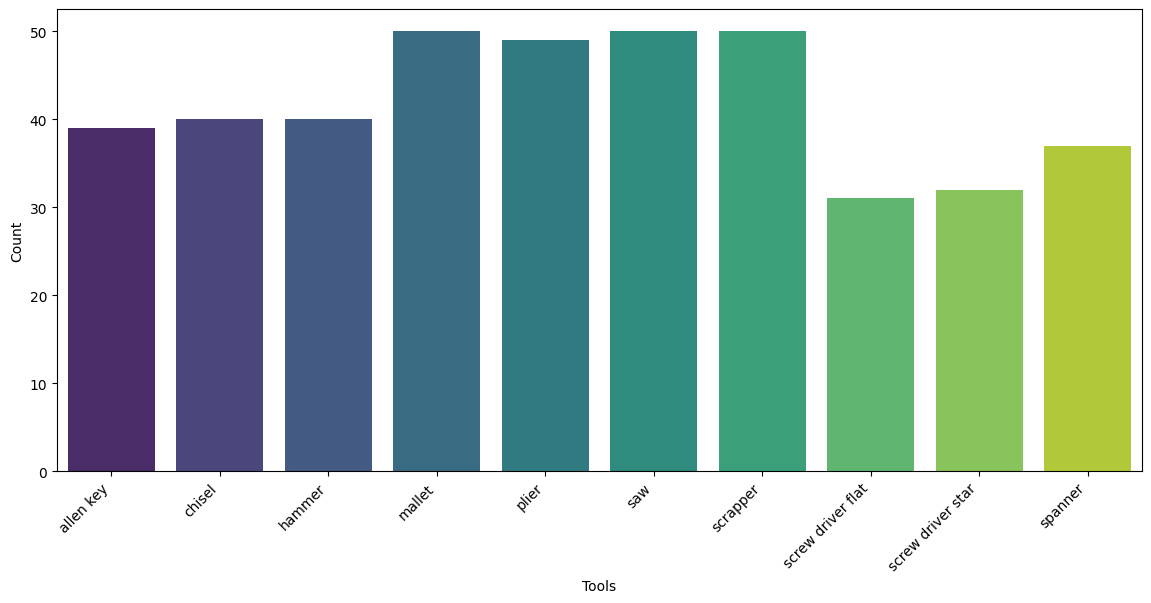

In [7]:
# Create a dataframe to plot the distribution


df = pd.DataFrame.from_dict(distribution, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Tools'}, inplace=True)

# Make a barplot
plt.figure(figsize=(14,6))
sns.barplot(x='Tools', y='Count', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()



In [8]:
df

,Tools,Count
0,allen key,39
1,chisel,40
2,hammer,40
3,mallet,50
4,plier,49
5,saw,50
6,scrapper,50
7,screw driver flat,31
8,screw driver star,32
9,spanner,37
